# SVM Project

## Part 1

The first part is based on code by Carolina Bento from:\
https://medium.com/data-science/support-vector-machines-explained-with-python-examples-cb65e8172c85

and modified by Paul von Dohlen

In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split

---

We'll look at some generated datasets and see how various SVM apporaches work on them.

### Dataset 1

Create and plot a dataset:

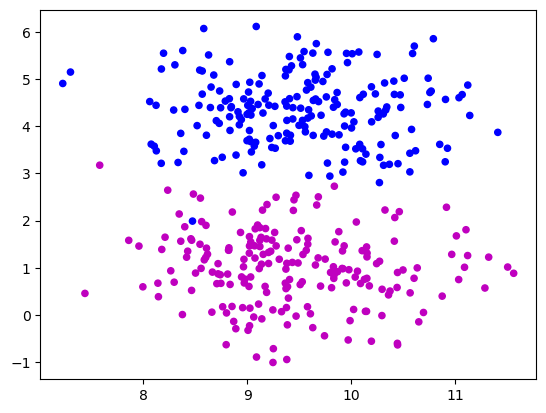

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, centers=2,
                  random_state=4, cluster_std=0.8)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#4786D1','#8C7298'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['m','b'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap);

Split the data into a training set and a test set:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define a function to do some plotting each time:

In [8]:
def plot_with_SVM(x_train,y_train,test_show):
    fig, ax = plt.subplots(figsize=(8, 5))
    # Create grid to evaluate model
    xx = np.linspace(min(x_train[:,0])-.2, max(x_train[:,0]) + .2, len(x_train))
    yy = np.linspace(min(x_train[:,1])-.2, max(x_train[:,1]) + .2, len(y_train))
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    # Assigning different colors to the classes
    colors = y_train
    colors = np.where(colors == 1, 'b', 'm')
    # Plot the dataset
    ax.scatter(x_train[:,0], x_train[:,1], c=colors)
    # Get the separating hyperplane
    Z = model.decision_function(xy).reshape(XX.shape)
    # Draw the decision boundary and margins
    #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # Draw the decision boundary only
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
    # Highlight support vectors with a circle around them
    #ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    # if the test points are to be plotted as well
    if test_show == 1:
        colors = y_test
        colors = np.where(colors == 1, 'c', 'r')
        ax.scatter(x_test[:,0], x_test[:,1], c=colors)
        
    plt.show()

Import SVM from Scikit-Learn:

In [9]:
from sklearn import svm

### Linear SVM

In [10]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

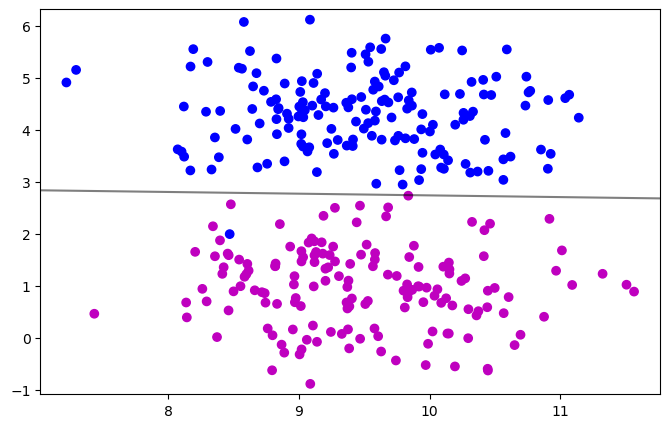

In [11]:
plot_with_SVM(x_train,y_train,0)

In [12]:
from sklearn.metrics import accuracy_score
predictions_linear = model.predict(x_test)
accuracy_linear = accuracy_score(y_test, predictions_linear)
print("linear polynomial Kernel\nAccuracy (normalized): " + str(accuracy_linear))

linear polynomial Kernel
Accuracy (normalized): 0.9875


In [13]:
#plot_with_SVM(x_train,y_train,1)

### Polynomial SVM

In [14]:
model = svm.SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)

SVC(kernel='poly')

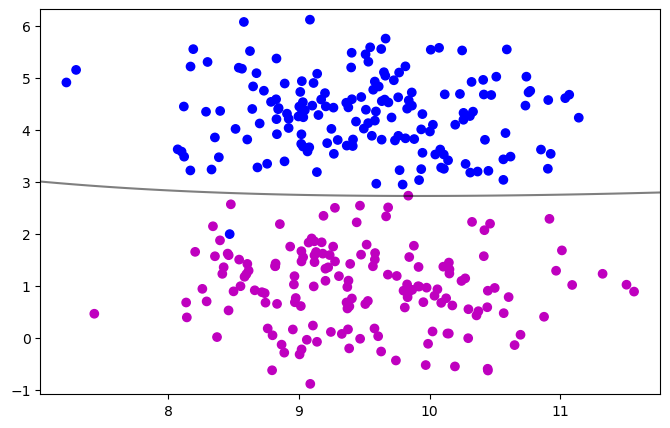

In [15]:
plot_with_SVM(x_train,y_train,0)

In [16]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("Polynomial (deg:{}) Kernel\nAccuracy (normalized): ".format(model.degree) + str(accuracy_poly))

Polynomial (deg:3) Kernel
Accuracy (normalized): 0.9875


In [17]:
#plot_with_SVM(x_train,y_train,1)

### RBF Kernel

In [18]:
model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

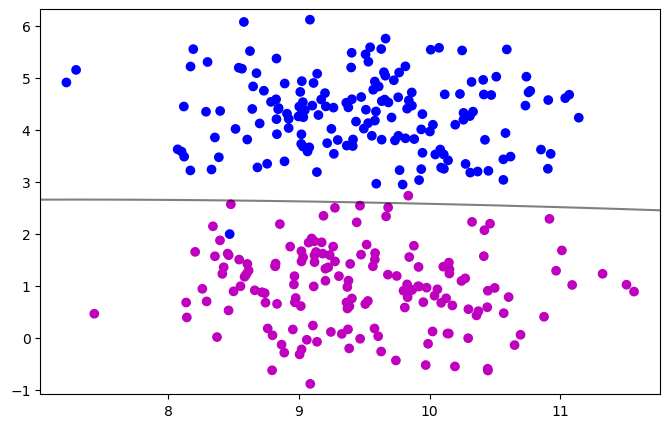

In [19]:
plot_with_SVM(x_train,y_train,0)

In [20]:
from sklearn.metrics import accuracy_score
predictions_rbf = model.predict(x_test)
accuracy_rbf = accuracy_score(y_test, predictions_rbf)
print("rbf Kernel\nAccuracy (normalized): " + str(accuracy_rbf))

rbf Kernel
Accuracy (normalized): 0.975


In [21]:
#plot_with_SVM(x_train,y_train,1)

### Results - Dataset 1

In [22]:
print("Linear Kernel:\t\t\tAccuracy (normalized): " + str(accuracy_linear))
print("Polynomial (deg:{}) Kernel\tAccuracy (normalized): ".format(model.degree) + str(accuracy_poly))
print("RBF Kernel:\t\t\tAccuracy (normalized): " + str(accuracy_rbf))

Linear Kernel:			Accuracy (normalized): 0.9875
Polynomial (deg:3) Kernel	Accuracy (normalized): 0.9875
RBF Kernel:			Accuracy (normalized): 0.975


### QUESTION 1:

Based on the results, which version seesm to be performing best (also keeping in mind that simpler is better if it has the same accuracy)?  Why does this make sense based on the layout of the data?

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: The linear kernel performs best because it achieves the same highest accuracy (0.9875) as the polynomial kernel while being simpler. A simpler model is preferred when accuracy is equal because it is less likely to overfit and is easier to interpret.
This makes sense given the data layout: the classes in this dataset are already well separated in a mostly linear fashion, so a linear decision boundary is sufficient. Polynomial or RBF kernels do not provide any meaningful improvement and only add unnecessary complexity.

---

### New Dataset - Dataset 2

Create and plot a dataset:

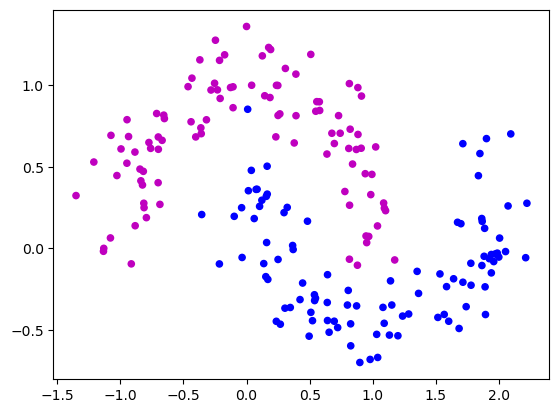

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['m','b'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap);

Split the data into a training set and a test set:

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn import svm

### Linear SVM

In [26]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

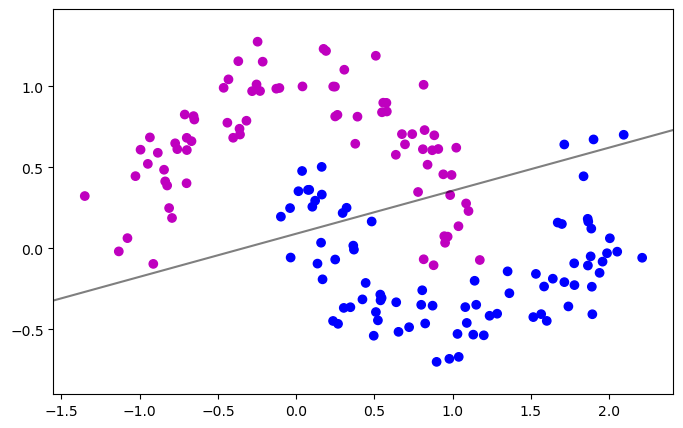

In [27]:
plot_with_SVM(x_train,y_train,0)

In [28]:
from sklearn.metrics import accuracy_score
predictions_linear = model.predict(x_test)
accuracy_linear = accuracy_score(y_test, predictions_linear)
print("linear polynomial Kernel\nAccuracy (normalized): " + str(accuracy_linear))

linear polynomial Kernel
Accuracy (normalized): 0.85


In [29]:
#plot_with_SVM(x_train,y_train,1)

### Polynomial SVM

In [30]:
model = svm.SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)

SVC(kernel='poly')

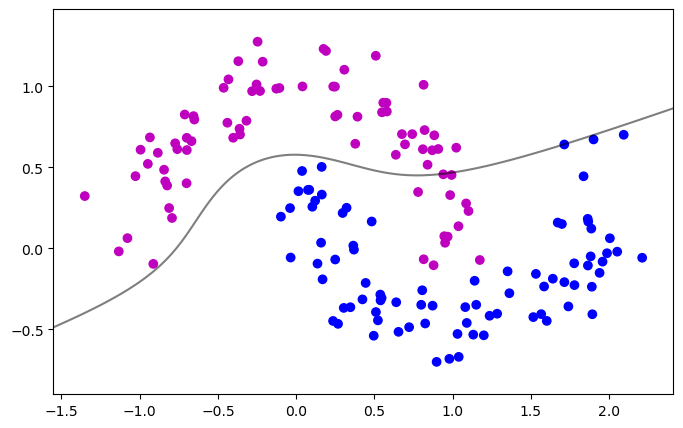

In [31]:
plot_with_SVM(x_train,y_train,0)

In [32]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("Polynomial (deg:{}) Kernel\nAccuracy (normalized): ".format(model.degree) + str(accuracy_poly))

Polynomial (deg:3) Kernel
Accuracy (normalized): 0.925


In [33]:
#plot_with_SVM(x_train,y_train,1)

In [34]:
model.degree

3

### RBF Kernel

In [35]:
model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

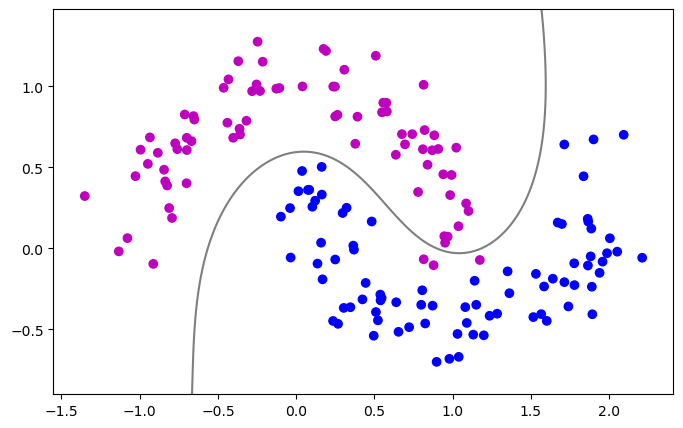

In [36]:
plot_with_SVM(x_train,y_train,0)

In [37]:
from sklearn.metrics import accuracy_score
predictions_rbf = model.predict(x_test)
accuracy_rbf = accuracy_score(y_test, predictions_rbf)
print("rbf Kernel\nAccuracy (normalized): " + str(accuracy_rbf))

rbf Kernel
Accuracy (normalized): 0.975


In [38]:
#plot_with_SVM(x_train,y_train,1)

**Results - Dataset 2**

In [39]:
print("Linear Kernel:\t\t\tAccuracy (normalized): " + str(accuracy_linear))
print("Polynomial (deg:{}) Kernel\tAccuracy (normalized): ".format(model.degree) + str(accuracy_poly))
print("RBF Kernel:\t\t\tAccuracy (normalized): " + str(accuracy_rbf))

Linear Kernel:			Accuracy (normalized): 0.85
Polynomial (deg:3) Kernel	Accuracy (normalized): 0.925
RBF Kernel:			Accuracy (normalized): 0.975


### QUESTION 2:

Based on the results, which version seems to be performing best for this dataset?  Why does this make sense based on the layout of the data?

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: The RBF kernel performs best, with the highest accuracy of 0.975. This makes sense because the dataset is not linearly separable and likely contains curved or nonlinear boundaries between classes. The RBF kernel can model these complex shapes by creating flexible, nonlinear decision surfaces.
In contrast, the linear and polynomial kernels cannot adapt as well to the curved structure in the data, which explains their lower accuracy.

---

## Part 2

This second part is based on code originally created by Aurélien Géron to accompany his book
*Hands-On Machine Learning with Scikit-Learn and TensorFlow (2nd ed)* and modified by Paul von Dohlen.

### Using SVM on the MNIST dataset

First, let's load the MNIST dataset and split it into a training set and a test set. We could use `train_test_split()` but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others).

Here we will use 10,000 instances for the training and 2000 for the test, just to keep computational time down.

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this, we use `as_frame=False`.

In [40]:
from sklearn.datasets import fetch_openml
from sklearn.svm import LinearSVC
import time

# Load MNIST from OpenML
print("Downloading MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(int)

# Use a small subset
n_train = 10000
n_test  = 2000

X_train, y_train = X[:n_train], y[:n_train]
X_test,  y_test  = X[60000:60000+n_test], y[60000:60000+n_test]

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (10000, 784)
Test set: (2000, 784)


Many training algorithms are sensitive to the order of the training instances, so it's generally good practice to shuffle them first. However, the dataset is already shuffled, so we do not need to do it.

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

**Warning**: this may take a few minutes depending on your hardware.

Also, you can ignore the "non-convergence" warning.

In [41]:
from sklearn.svm import LinearSVC

# Linear SVC
lin_clf = LinearSVC(random_state=42, C=1, max_iter=5000, dual=False, tol=1e-3)

# Train
print("\nTraining LinearSVC...")
start_train = time.time()
lin_clf.fit(X_train, y_train)
end_train = time.time()

train_time = end_train - start_train
print(f"Training time: {train_time:.3f} seconds")


Training LinearSVC...
Training time: 51.048 seconds


Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [42]:
from sklearn.metrics import accuracy_score

# Test
y_pred = lin_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.8385


Okay, ~84% accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we neglected to do something?

### QUESTION 3:

What did we neglect to do (which is highly recommended before using SVM) that may have caused our algorithm to not perform as well?  And why do we do it?

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: I believe, We forgot to scale(normalize) the data before training the SVM. SVMs work much better when all features are on a similar scale. If the data is not scaled, some features dominate others, and the model struggles to learn good boundaries. Scaling the pixel values (dividing by 255) usually gives a big improvement in accuracy.

---

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

**Warning**: this may take a few minutes depending on your hardware.

In [44]:
lin_clf = LinearSVC(random_state=42, C=1, max_iter=5000, dual=False, tol=1e-3)

start_train = time.time()
lin_clf.fit(X_train_scaled, y_train)
end_train = time.time()

train_time = end_train - start_train
print(f"Training time: {train_time:.3f} seconds")

Training time: 404.007 seconds


In [45]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9777

An accuracy of 97.8% is much better, but may we can do even better than that. If we want to use an SVM, we will have to use a different kernel. Let's try an `SVC` with an RBF kernel.

**Note**: to be future-proof we set `gamma="scale"` since it will be the default value in Scikit-Learn 0.22.

Again, we are only going to use 10000 examples, just because it will take very long for SVC on a large dataset.

In [46]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma="scale")
start_train = time.time()
svm_clf.fit(X_train_scaled, y_train)
end_train = time.time()

train_time = end_train - start_train
print(f"Training time: {train_time:.3f} seconds")

Training time: 21.577 seconds


In [47]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9838

That's promising, we get better performance and it was faster. 

Let's take a look at two hyperparameters in SVM with an 'rbf' kernel: $C$ and $\gamma$.

In [48]:
svm_clf.C

1.0

In [49]:
svm_clf._gamma

0.0014858840978296353

We did not do a lot of hyperparamter-tuning, but consider the following as an example of how that might be done.

Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=8.771847707242008, gamma=0.03777763703968318; total time=   0.2s
[CV] END .....C=8.771847707242008, gamma=0.03777763703968318; total time=   0.2s
[CV] END .....C=8.771847707242008, gamma=0.03777763703968318; total time=   0.2s
[CV] END ....C=10.756398100338924, gamma=0.00109904585691784; total time=   0.1s
[CV] END ....C=10.756398100338924, gamma=0.00109904585691784; total time=   0.1s
[CV] END ....C=10.756398100338924, gamma=0.00109904585691784; total time=   0.1s
[CV] END ...C=3.4630005404004485, gamma=0.002423688506568072; total time=   0.2s
[CV] END ...C=3.4630005404004485, gamma=0.002423688506568072; total time=   0.2s
[CV] END ...C=3.4630005404004485, gamma=0.002423688506568072; total time=   0.2s
[CV] END .....C=7.029442337995542, gamma=0.01844508749687554; total time=   0.2s
[CV] END .....C=7.029442337995542, gamma=0.01844508749687554; total time=   0.2s
[CV] END .....C=7.029442337995542, gamma=0.01844

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F4632DA390>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F4632DAA20>},
                   verbose=2)

In [51]:
rnd_search_cv.best_estimator_

SVC(C=10.756398100338924, gamma=0.00109904585691784)

In [52]:
rnd_search_cv.best_score_

0.8599977222731714

This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the best estimator on the whole training set:

**I have commented out the following cells because they would take very long to run.  Below you can see an image (from the Results.png file) showing what you would get.  Note that if you do run it, you may get different results because there is some randomness built in.**

**Warning**: the following cell may take hours to run, depending on your hardware.

In [53]:
#Return to full MNIST dataset.
#X_train = X[:60000]
#y_train = y[:60000]
#X_test = X[60000:]
#y_test = y[60000:]

#print("Training set:", X_train.shape)
#print("Test set:", X_test.shape)

In [54]:
#Scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
#X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [55]:
#rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [56]:
#y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
#accuracy_score(y_train, y_pred)

Ah, this looks good! Let's select this model. Now we can test it on the test set:

In [57]:
#y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
#accuracy_score(y_test, y_pred)

Below is the ouput you would get from running the previous cells:

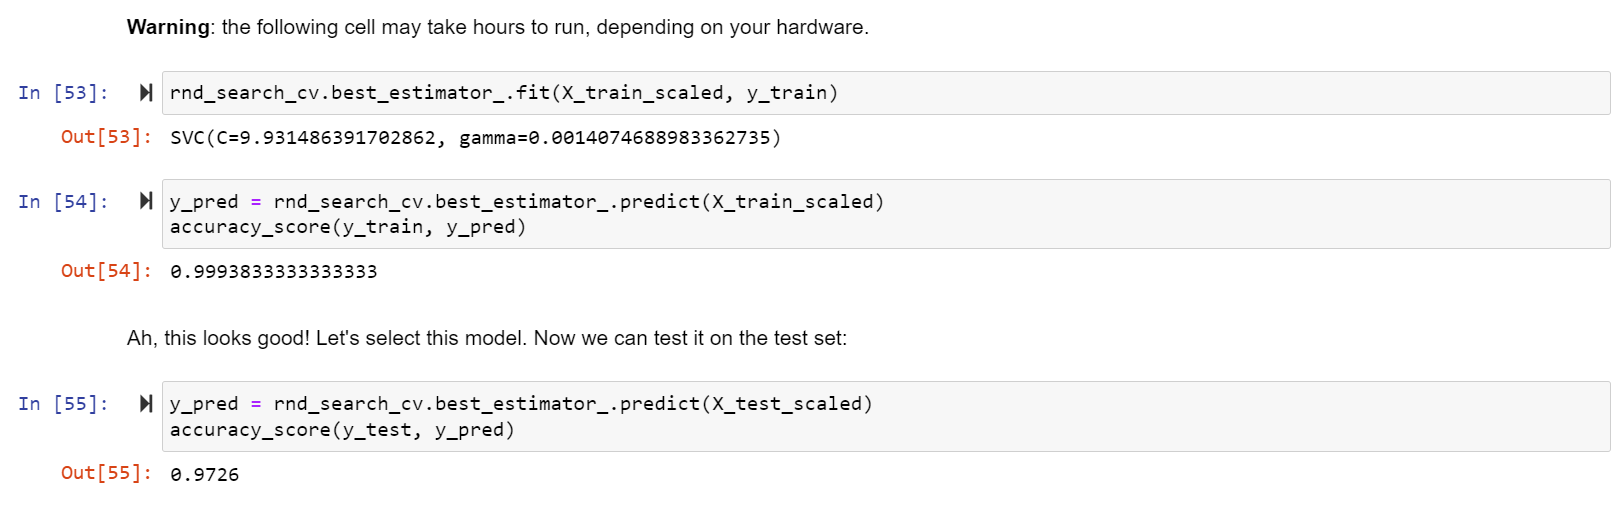

Not too bad, but apparently the model is overfitting slightly.  We say that because it is performing better on the training set than on the test set, indicating that it has worked too hard to learn the training set in a way that won't generalize to new data.

It's tempting to tweak the hyperparameters a bit more (e.g. decreasing `C` and/or `gamma`), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters `C=5` and `gamma=0.005` yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

We've seen that we can build an SVM model that classifies written digits with a high degree of accuracy!

---

## Part 3

#### General SVM Questions

Consider the data generated by the following and answer Question 4 based on it:

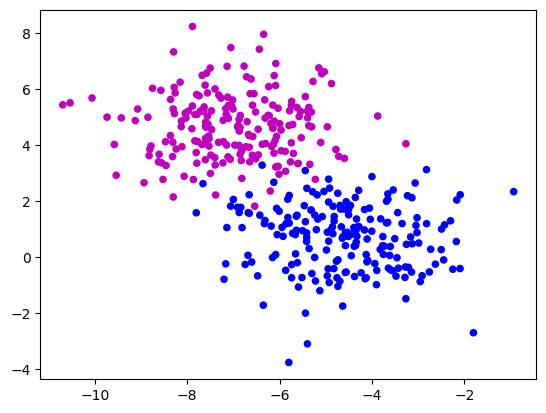

In [60]:
Random_State = 12   #Change this value

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, centers=2,
                  random_state=Random_State, cluster_std=1.2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#4786D1','#8C7298'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['m','b'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap);

### QUESTION 4:

For the above dataset generator, change the value of **Random_State** to look at the datasets generated using 2, 12, and 22.

For which of those values of **Random_State** would a linear Hard-Margin SVM not work and why?

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: When we try Random_State values 2, 12, and 22, the only one that does not work for a linear hard margin SVM is Random_State = 12. In this case, the two groups of points overlap too much, so there is no straight line that can separate them perfectly. A hard-margin SVM requires the data to be completely linearly separable, and since the points mix together for Random_State 12, the model cannot find a perfect boundary.

---

### QUESTION 5:

In Soft-Margin SVM, we allow examples to fall within the margin (or even on the wrong side).  We control this by the $C$ hyperparamter.  If we wanted to limit the number of these "margin-violation" examples, would we make $C$ a large number or a small number?  Why? 

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: We would make C a large number. A large C means the SVM strongly punishes margin violations, so the model will try very hard to avoid misclassified or margin violating points. This forces the SVM to create a boundary with as few mistakes as possible. A small c does the opposite, it allows more violations because the model doesn’t penalize them as much.

---

The end.